<a href="https://colab.research.google.com/github/Bambillo1/elecomsCoding_academy/blob/main/Docs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
* **Full Name** =
* **UCID** =
***

| Q     | Title                                             | Points |
|-------|---------------------------------------------------|--------|
| **1** | **Carbon Intensity Analysis (60 pts)**            |        |
| 1.1   | Descriptive   Statistics                          | 8      |
| 1.2   | Time Period Analysis                              | 4      |
| 1.3   | Peak (actual)   Intensity Detection               | 6      |
| 1.4   | Data Filtering                                    | 8      |
| 1.5   | Weekday vs.   Weekend Analysis                    | 8      |
| 1.6   | Time of Day Analysis                              | 8      |
| 1.7   | Histogram   Visualization                         | 10     |
| 1.8   | Boxplot of Actual and Forecasted Intensity        | 8      |
| **2** | **Image   Transformations using OpenCV (40 pts)** |        |
| 2.a   | Apply Gaussian blur                               | 8      |
| 2.b   | Rotate the image                                  | 4      |
| 2.c   | Resize the image                                  | 4      |
| 2.d   | Grayscale                                         | 4      |
| 2.e   | Canny edge detection                              | 10     |
| 2.f   | Binary   thresholding                             | 10     |
|       | Total                                             | 100    |

You can use the Table of Content on the left side of this notebook to efficiently navigate within this documents.

<font color='Red'><b>Notes:</b></font>

* <font color='Red'><b>Packages that you are allowed to use: matplotlib, numpy, pandas, seaborn, and cv2</b></font>
* <font color='Red'><b>Ensure that your submitted Jupyter notebook is executable with a single click of the "Run All" option within the "Runtime" menu, without the need for downloading or uploading external datasets.</b></font>

* <font color='Green'><b>You are welcome to personalize the colors and other design elements to enhance the aesthetics of the plot to your liking.</b></font>

**Scoring Breakdown**:

1. **Achieving Desired Outputs and Addressing Questions: 70%**
   - This portion of your score evaluates how effectively you meet the objectives and answer the questions. It carries a weight of 70% in your overall evaluation.

2. **Incorporating Comments and Providing Explanations: 30%**
   - This segment assesses your use of comments within code blocks and explanations following code blocks. It accounts for 30% of your total score.

# **1. Carbon Intensity Analysis (60 pts)**

**Objective:** In this assignment, you will analyze real-world carbon intensity data using Python's `requests`, `pandas`, `numpy`, and `seaborn` libraries. You will gain insights into carbon intensity patterns over a specific date range, calculate statistics, and create visualizations to present your findings.

**Instructions:**

1. Review the provided code that retrieves, processes, and analyzes carbon intensity data from an API.

2. Run the code to ensure that it works correctly and to understand its functionality.

3. Data Retrieval and Preparation:
   - Understand the purpose of the `fetch_from_to()` function and how it retrieves data from the Carbon Intensity API.
   - Explore how the retrieved data is converted into a pandas DataFrame for easier manipulation and analysis.
   - Identify how timestamps are converted to datetime objects.

**Tasks:**

* **1.1. Descriptive Statistics:** Calculate and print the mean and standard deviation of carbon (actual) intensity values over the specified date range. Round the output numbers to three decimal places.

* **1.2. Time Period Analysis:** Calculate and print the duration of the data collection period (i.e., the time between the earliest and latest timestamps).

* **1.3. Peak Intensity Detection:** Identify and print the timestamp and value associated with the highest carbon (actual) intensity.

* **1.4. Data Filtering:** Filter the data to include only entries with (actual) carbon intensity values above 200, and then calculate and print the mean and standard deviation of the filtered data. Round the output numbers to three decimal places.

* **1.5. Weekday vs. Weekend Analysis:** Create a new column indicating whether each entry corresponds to a weekday or weekend, and then calculate and print the mean (actual) carbon intensity values for weekdays and weekends separately. Round the output numbers to three decimal places.

* **1.6. Time of Day Analysis:** Extract the hour of the day from timestamps and group data by the hour, and create a bar plot to visualize the mean carbon (actual) intensity for each hour of the day.

* **1.7. Histogram Visualization:** Generate a histogram using the `seaborn` library, enabling the kernel density estimation (KDE) and utilizing 20 bins to portray the distribution of both actual and forecasted carbon intensity values. Ensure proper axis labeling and select a suitable bin count.

* **1.8. Boxplot of Actual and Forcasted Intensity:** Create a Seaborn boxplot to visualize the distribution of carbon intensity values (actual and forcaseted) and identify potential outliers (if there is any).

In [ ]:
from datetime import date
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the API base URL
BASE_URL = "https://api.carbonintensity.org.uk/intensity"

# Task 1: Fetch data from API
def fetch_from_to(start, end) -> list:
    url = f"{BASE_URL}/{start}/{end}"
    response = requests.get(url).json()
    return response["data"]

# Specify the date range
start_date = date(2023, 8, 1)
end_date = date(2023, 8, 7)

# Fetch data for the specified date range
data = fetch_from_to(start=start_date, end=end_date)

# Task 2: Create DataFrame and preprocess data
df = pd.DataFrame(data)
# Convert timestamps to datetime format
df['from'] = pd.to_datetime(df['from'])
df['to'] = pd.to_datetime(df['to'])
# A preview of the first 5 rows
display(df.head())

,from,to,intensity
0,2023-07-31 23:30:00+00:00,2023-08-01 00:00:00+00:00,"{'forecast': 90, 'actual': 93, 'index': 'low'}"
1,2023-08-01 00:00:00+00:00,2023-08-01 00:30:00+00:00,"{'forecast': 92, 'actual': 94, 'index': 'low'}"
2,2023-08-01 00:30:00+00:00,2023-08-01 01:00:00+00:00,"{'forecast': 96, 'actual': 95, 'index': 'low'}"
3,2023-08-01 01:00:00+00:00,2023-08-01 01:30:00+00:00,"{'forecast': 97, 'actual': 92, 'index': 'low'}"
4,2023-08-01 01:30:00+00:00,2023-08-01 02:00:00+00:00,"{'forecast': 99, 'actual': 95, 'index': 'low'}"


## **1.1 Descriptive Statistics** (8 pts)

Calculate and print the mean and standard deviation of carbon (actual) intensity values over the specified date range. **Round the output numbers to three decimal places**.


In [ ]:
# Your Contribution
actual= df['intensity'].apply(lambda x: x['actual'] if 'actual' in x else np.nan)
mean_actual_intensity = actual.mean()
std_actual_intensity = actual.std()

In [ ]:
# Print the mean and standard deviation, rounded to three decimal places
print(f"Mean Carbon Intensity: {mean_actual_intensity:.3f}")
print(f"Standard Deviation of Carbon Intensity: {std_actual_intensity:.3f}")

Mean Carbon Intensity: 137.696
Standard Deviation of Carbon Intensity: 45.192


<font color='Green'><b>Please provide detailed explanations of your code in this text block.
This code will create a new column in the DataFrame named  which will contain only the values associated with the 'actual' key from the 'intensity' column. If the 'actual' key is not present in some rows, it will place np.nan (which stands for "Not a Number" and is used to represent missing values) in those rows

</b></font>

## **1.2 Time Period Analysis** (4 pts)

Calculate and print the duration of the data collection period (i.e., the time between the earliest and latest timestamps).

In [ ]:
# Your Contribution
# Assuming 'from' and 'to' columns are already converted to datetime objects as per your previous code.

# Find the earliest start time
start_time = df['from'].min()

# Find the latest end time
end_time = df['to'].max()

# Calculate the duration of the data collection period
duration = end_time - start_time

# Print the duration
print(f"Duration of data collection period: {duration}")


Duration of data collection period: 6 days 00:30:00


<font color='Green'><b>No need to provide additional explanations in this block. In-line comments would be enough for Q1.2</b></font>

## **1.3 Peak (actual) Intensity Detection** (6 pts)

Identify and print the timestamp and value associated with the highest carbon (actual) intensity.


In [ ]:
# Your Contribution
# With 'actual'  the key in the dictionaries within the 'intensity' column that contains the actual intensity values.
# We'll first extract these values into a separate column as shown previously.

# Extract the 'actual' intensity values into a new column
df['actual_intensity'] = df['intensity'].apply(lambda x: x['actual'] if 'actual' in x else np.nan)

# Find the index of the row with the highest 'actual' intensity
max_intensity_idx = df['actual_intensity'].idxmax()

# Retrieve the row with the highest 'actual' intensity
max_intensity_row = df.loc[max_intensity_idx]

# Print the timestamp ('from' column) and the actual intensity value
print(f"Timestamp with highest carbon intensity: {max_intensity_row['from']}")
print(f"Highest carbon intensity value: {max_intensity_row['actual_intensity']}")

Timestamp with highest carbon intensity: 2023-08-04 22:30:00+00:00
Highest carbon intensity value: 258


<font color='Green'><b>No need to provide additional explanations in this block. In-line comments would be enough for Q1.3
The idxmax() function returns the index of the first occurrence of the maximum value, and loc is then used to retrieve the row corresponding to this index from the DataFrame. This gives me the timestamp from the 'from' column and the actual intensity value associated with the highest carbon intensity. Make sure the column names used match those in my DataFrame.

</b></font>

## **1.4 Data Filtering**  (8 pts)

Filter the data to include only entries with (actual) carbon intensity values above 200, and then calculate and print the mean and standard deviation of the filtered data. **Round the output numbers to three decimal places**.


In [ ]:
# Your Contribution
# Filter the DataFrame for 'actual' intensity values greater than 200
filtered_df = df[df['actual_intensity'] > 200]

# Calculate the mean and standard deviation of the filtered DataFrame
mean_intensity_filtered = filtered_df['actual_intensity'].mean()
std_dev_intensity_filtered = filtered_df['actual_intensity'].std()

# Print the mean and standard deviation, rounded to three decimal places
print(f"Mean Carbon Intensity (Filtered): {mean_intensity_filtered:.3f}")
print(f"Standard Deviation of Carbon Intensity (Filtered): {std_dev_intensity_filtered:.3f}")

Mean Carbon Intensity (Filtered): 224.351
Standard Deviation of Carbon Intensity (Filtered): 16.187


<font color='Green'><b>Please provide detailed explanations of your code in this text block.
1. Extract the 'actual' intensity values into a new column if not already done.
2.Filter the DataFrame based on the condition that the 'actual' intensity values are greater than 200.
3. Calculate the mean and standard deviation of the filtered DataFrame.

</b></font>

## **1.5. Weekday vs. Weekend Analysis** (8 pts)

Create a new column indicating whether each entry corresponds to a weekday or weekend, and then calculate and print the mean (actual) carbon intensity values for weekdays and weekends separately. **Round the output numbers to three decimal places**.



In [ ]:
# Extract the 'actual' intensity values into a new column if not already done
df['actual_intensity'] = df['intensity'].apply(lambda x: x['actual'] if 'actual' in x else np.nan)

# Define a function that categorizes the day of the week
def categorize_day(day):
    if day.weekday() < 5:  # Monday=0, Sunday=6
        return 'Weekday'
    else:
        return 'Weekend'

# Create a new column 'day_type' to indicate whether each entry is a weekday or a weekend
df['day_type'] = df['from'].apply(categorize_day)

# Group by the 'day_type' column and calculate the mean 'actual' intensity for each group
mean_intensity_by_day_type = df.groupby('day_type')['actual_intensity'].mean().round(3)

# Print the mean actual carbon intensity values for weekdays and weekends
print(f"Weekday Mean Carbon Intensity: {mean_intensity_by_day_type['Weekday']}")
print(f"Weekend Mean Carbon Intensity: {mean_intensity_by_day_type['Weekend']}")


Weekday Mean Carbon Intensity: 139.575
Weekend Mean Carbon Intensity: 133.917


<font color='Green'><b>Please provide detailed explanations of your code in this text block.
1. Extract the day of the week from the 'from' datetime column.**
2. Create a new column that categorizes the day as either 'Weekday' or 'Weekend'.**
3. Group by this new column and calculate the mean of the 'actual' carbon intensity values for weekdays and weekends separately.**

</b></font>

## **1.6 Time of Day Analysis** (8 pts)

Extract the hour of the day from timestamps and group data by the hour, and create a bar plot to visualize the mean carbon (actual) intensity for each hour of the day.

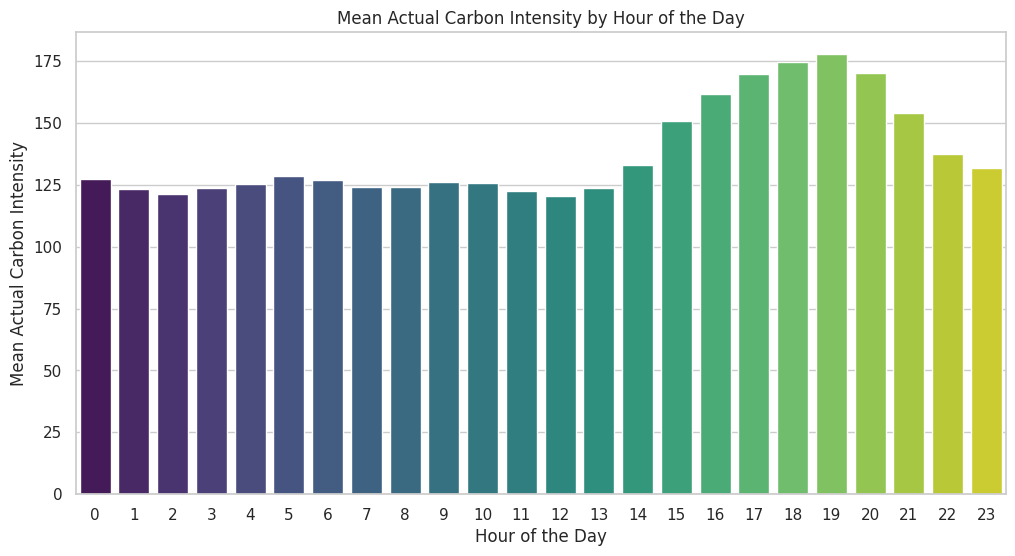

In [ ]:
# Your Contribution
#Use the pandas library to extract the hour from the 'from' datetime column.
#Group the data by the extracted hour.
#Calculate the mean actual carbon intensity for each hour.
#Use the seaborn or matplotlib library to create a bar plot of the mean intensity per hour.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'actual_intensity' is the column with the actual carbon intensity values.
# And 'from' is the column with the datetime values.

# Extract the hour from the 'from' datetime column
df['hour'] = df['from'].dt.hour

# Group by the 'hour' column and calculate the mean 'actual' intensity
mean_intensity_by_hour = df.groupby('hour')['actual_intensity'].mean().reset_index()

# Now create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='actual_intensity', data=mean_intensity_by_hour, palette='viridis')

# Adding titles and labels
plt.title('Mean Actual Carbon Intensity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Actual Carbon Intensity')

# Show the plot
plt.show()


<font color='Green'><b>No need to provide additional explanations in this block. In-line commends would be enough for Q1.6</b></font>

## **1.7 Histogram Visualization** (10 pts)

Generate a histogram using the `seaborn` library, enabling the kernel density estimation (KDE) and utilizing 20 bins to portray the distribution of both actual and forecasted carbon intensity values. Ensure proper axis labeling and select a suitable bin count.

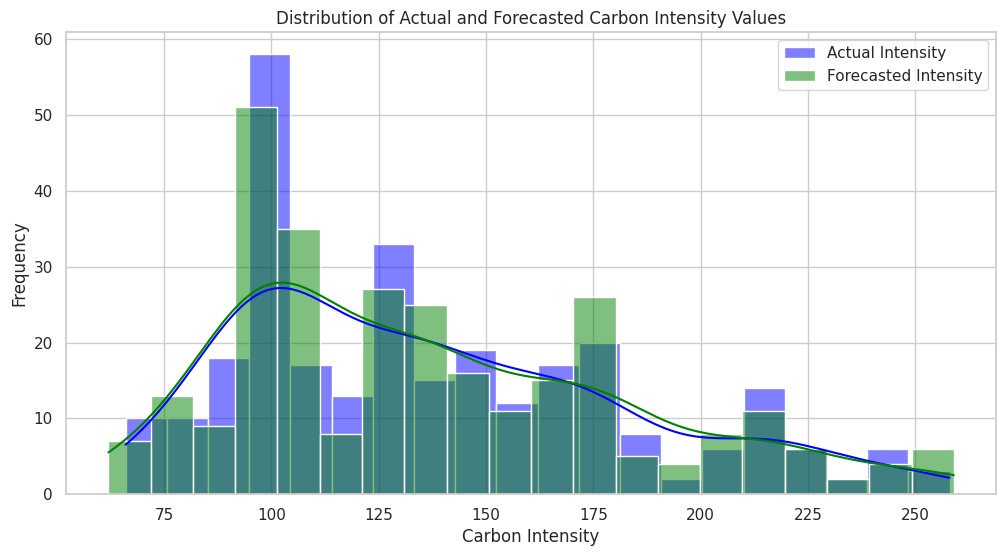

In [ ]:
# Your Contribution

# This code assumes you have two columns 'actual_intensity' and 'forecasted_intensity' in the DataFrame.
# It generates a histogram with KDE for both actual and forecasted carbon intensity values.

import seaborn as sns
import matplotlib.pyplot as plt

#Extract the 'forecasted' intensity values into a new column if not already done
df['forecasted_intensity'] = df['intensity'].apply(lambda x: x['forecast'] if 'forecast' in x else np.nan)
#helper function to generate histograms using seaborn
def plot_intensity_distribution(df):
    # Set the style of seaborn
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 6))

    # Plot the histogram with KDE for actual intensity values
    sns.histplot(df['actual_intensity'], color="blue", kde=True, bins=20, label='Actual Intensity', ax=ax)

    # Plot the histogram with KDE for forecasted intensity values
    sns.histplot(df['forecasted_intensity'], color="green", kde=True, bins=20, label='Forecasted Intensity', ax=ax)

    # Add proper labeling
    ax.set_title('Distribution of Actual and Forecasted Carbon Intensity Values')
    ax.set_xlabel('Carbon Intensity')
    ax.set_ylabel('Frequency')

    # Show legend
    ax.legend()

    # Show the plot
    plt.show()

plot_intensity_distribution(df)

<font color='Green'><b>No need to provide additional explanations in this block. In-line commends would be enough for Q1.7</b></font>

## **1.8 Boxplot of Actual and Forecasted Intensity**

Create a Seaborn boxplot to visualize the distribution of carbon intensity values (actual and forcaseted) and identify potential outliers (if there is any).

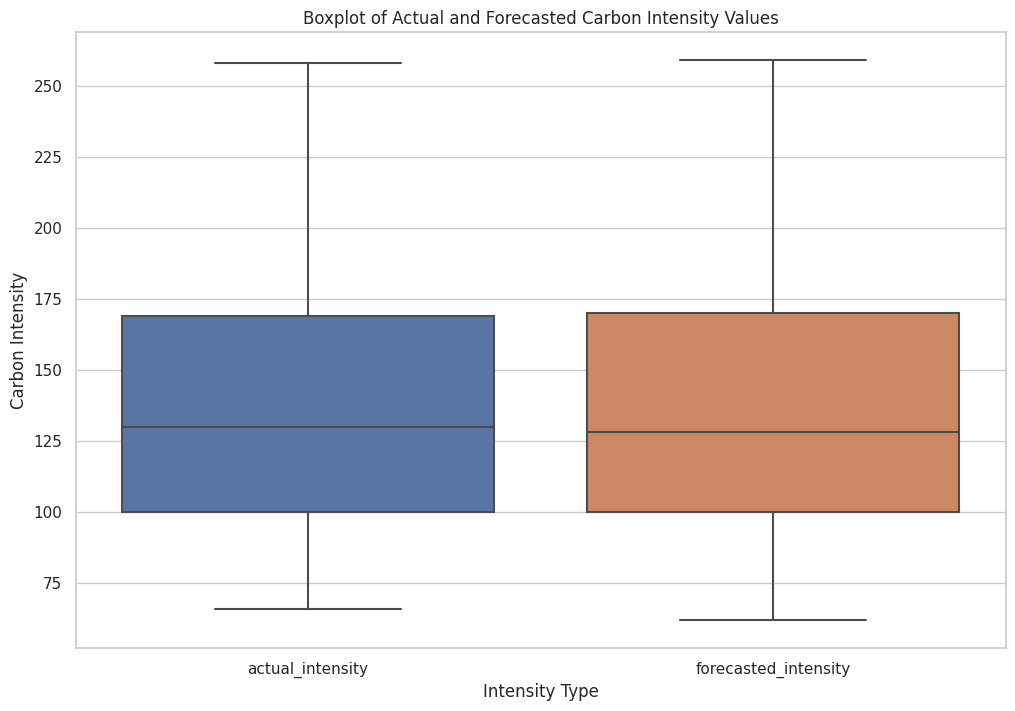

In [ ]:
# Your Contribution
import seaborn as sns
import matplotlib.pyplot as plt


# First, we need to reshape the DataFrame from wide to long format to use in Seaborn's boxplot
df_long = pd.melt(df, value_vars=['actual_intensity', 'forecasted_intensity'], var_name='Type', value_name='Intensity')

# Now, we create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='Intensity', data=df_long)

# Adding titles and labels
plt.title('Boxplot of Actual and Forecasted Carbon Intensity Values')
plt.xlabel('Intensity Type')
plt.ylabel('Carbon Intensity')

# Show the plot
plt.show()


<font color='Green'><b>No need to provide additional explanations in this block. In-line commends would be enough for Q1.8</b></font>

# **2. Image Transformations using OpenCV (40 pts)**

**Instructions:**

1. Load the `Kananaskis.jpg` image to use as the input image for transformations.

2. Use the OpenCV library (`cv2`) to perform the following transformations on the imported image:

  * a. Apply Gaussian blur to the image with a 7x7 kernel and $\sigma_x = \sigma_y = 0$ to reduce noise and smooth the image.

  * b. Rotate the image counter-clockwise by 45 degrees to change its orientation.

  * c. Resize the image to half of its original dimensions, maintaining the aspect ratio.

  * d. Convert the image to grayscale.

  * e. Apply edge detection using the Canny edge detector. Find the appropriate thresholds that distinguish the mountains and lake edges from the clouds in the sky. See the Example output.

  * f. Implement binary thresholding to identify the thresholds that remove the clouds from the output image, using the grayscale image as a starting point. See the Example output.
   
3. Display all six transformed images along with their original version in a 2x3 Matplotlib grid using `imshow`.

**Example output**:
![Img](https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Assignment_05/Q5_2.png)

***
**Your Contribution**

Please make sure that add comments for the readiblity of your code.

***

In [ ]:
# download Kananaskis.jpg
!wget -N https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Assignment_05/Kananaskis.jpg

--2023-11-07 17:19:13--  https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Assignment_05/Kananaskis.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545268 (532K) [image/jpeg]
Saving to: ‘Kananaskis.jpg’

Kananaskis.jpg      100%[===================>] 532.49K  --.-KB/s    in 0.05s   

Last-modified header missing -- time-stamps turned off.
2023-11-07 17:19:14 (9.77 MB/s) - ‘Kananaskis.jpg’ saved [545268/545268]



a. Apply Gaussian blur to the image with a 7x7 kernel and σx=σy=0 to reduce noise and smooth the image.

In [ ]:
# Your Contribution

import cv2

# Read the image
image_path = '/content/Kananaskis.jpg'
image = cv2.imread(image_path)

# Check if the image was loaded properly
if image is None:
    raise ValueError(f"The image at path {image_path} could not be loaded.")

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image, (7, 7), 0)

# Save the resulting image
cv2.imwrite('blurred_image.jpg', blurred_image)




True

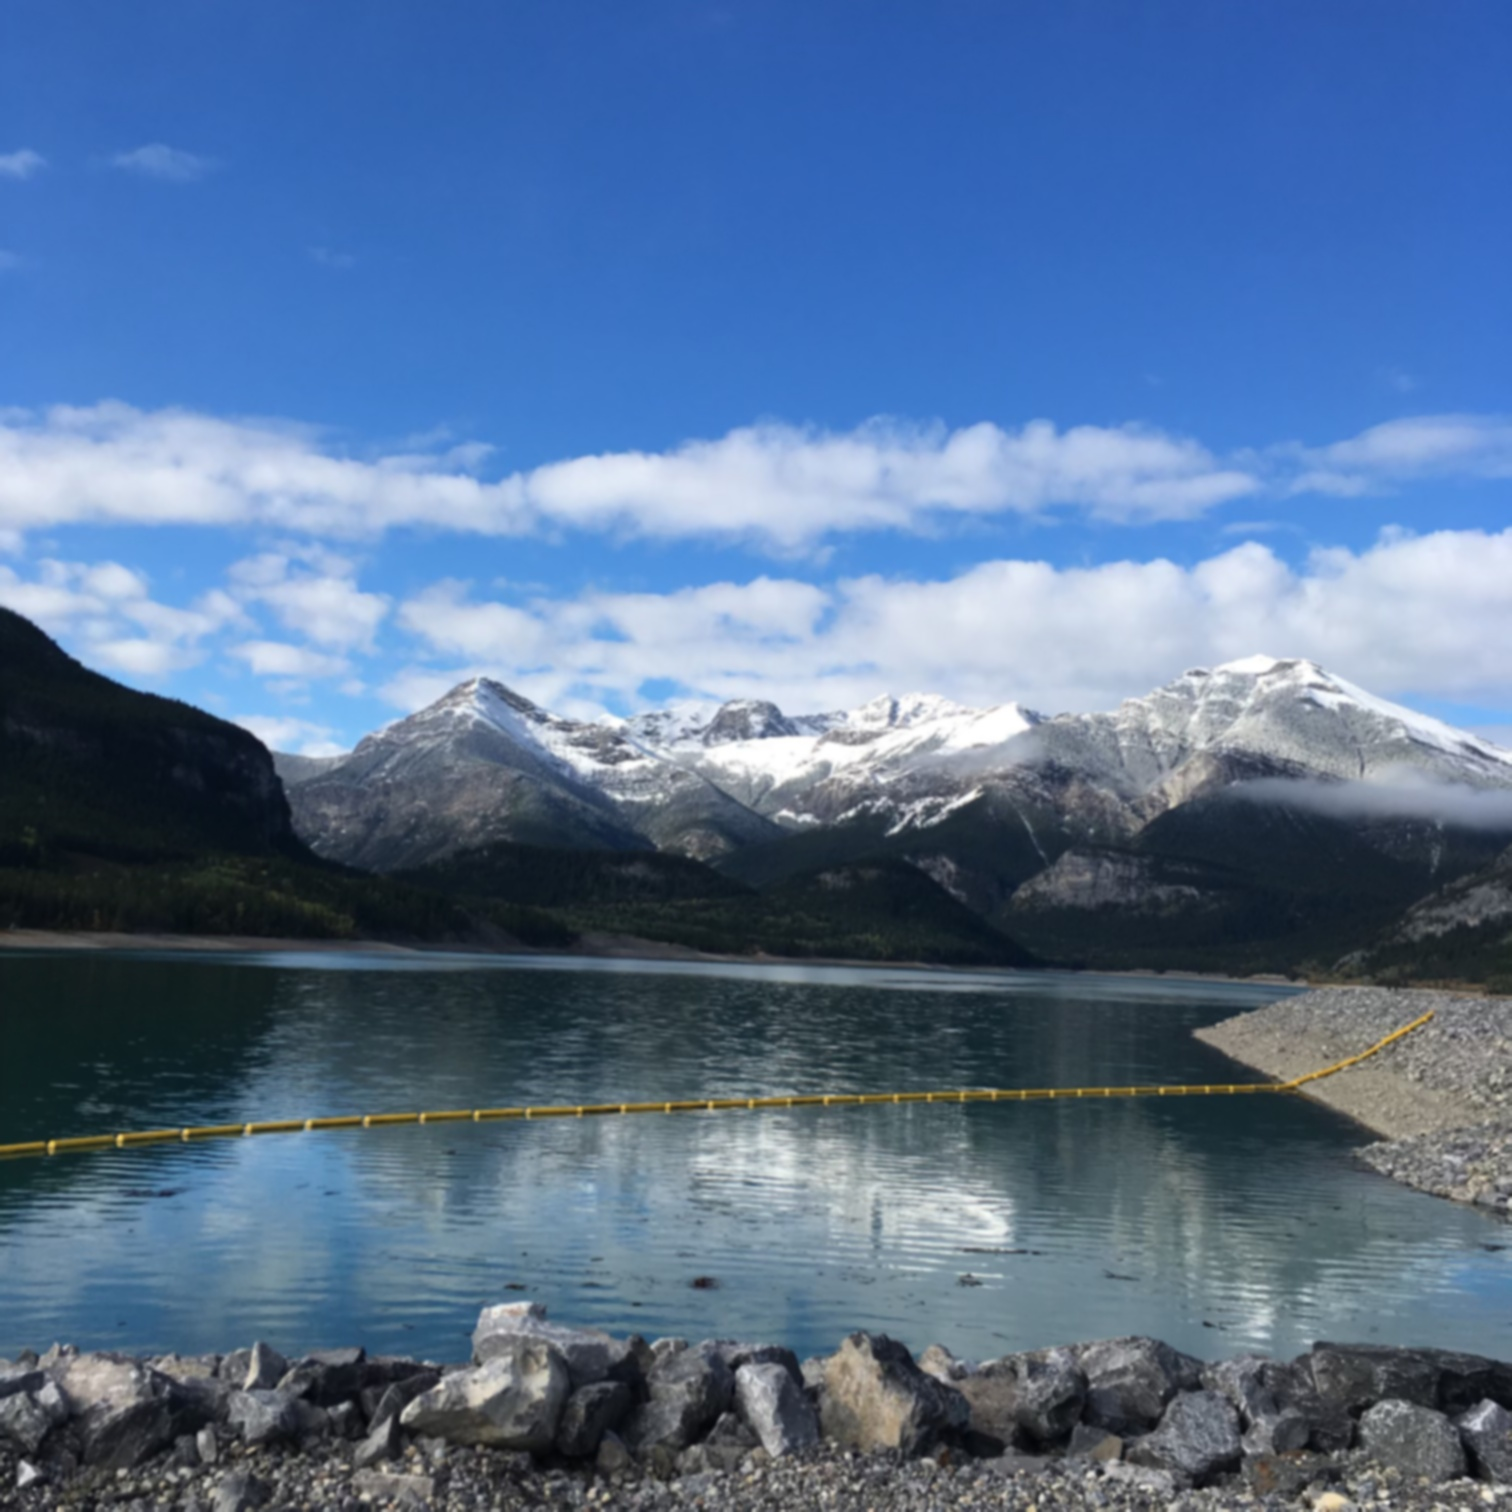

In [ ]:
import cv2

# Read the image
image = cv2.imread('/content/Kananaskis.jpg')

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image, (7, 7), 0)

# Save the resulting image
cv2.imwrite('blurred_image.jpg', blurred_image)




<font color='Green'><b>No need to provide additional explanations in this block. In-line comments would be enough for Q2.</b></font>

b. Rotate the image counter-clockwise by 45 degrees to change its orientation.

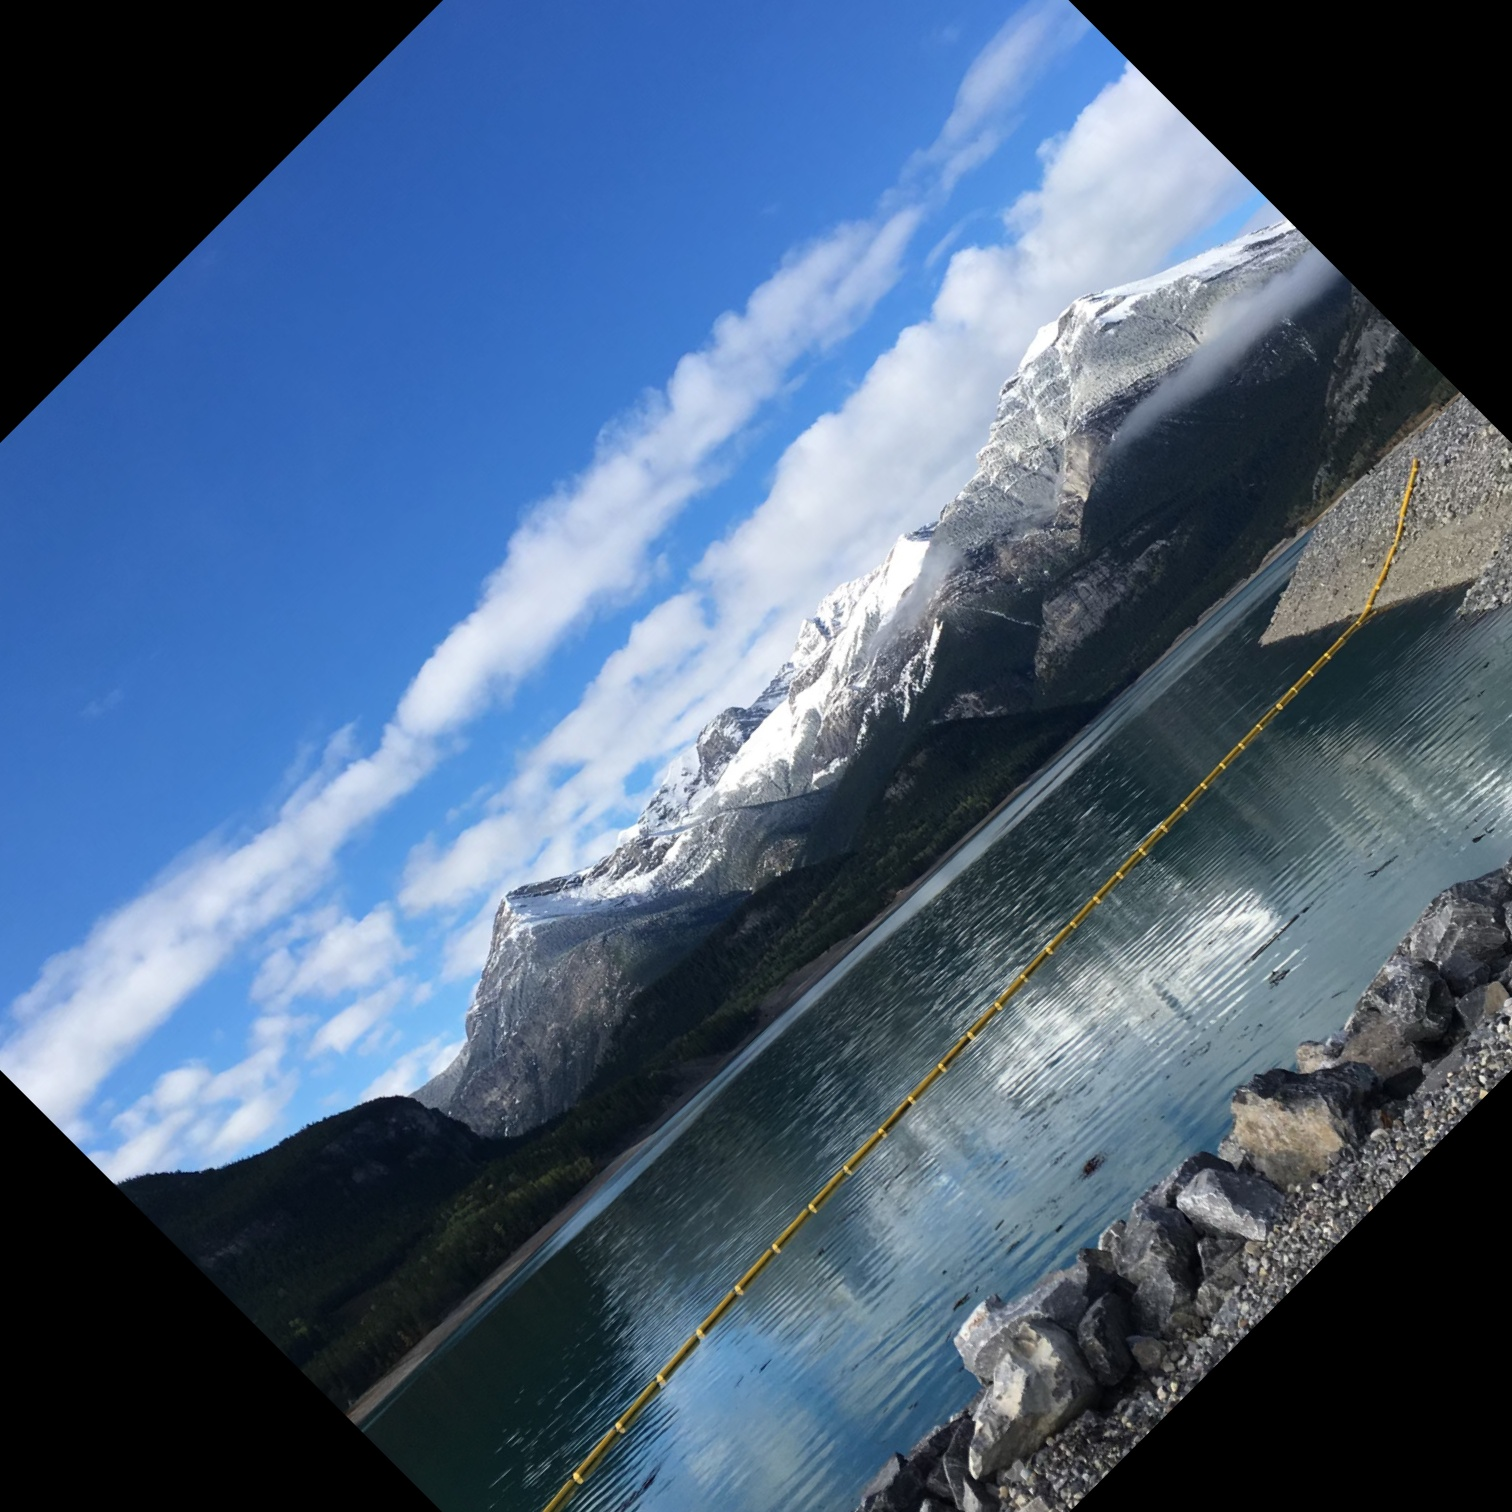

In [ ]:
import cv2

# Load your image
image = cv2.imread('/content/Kananaskis.jpg')

# Define the rotation center, which is the center of the image
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# Compute the rotation matrix
M = cv2.getRotationMatrix2D(center, 45, 1.0)  # 45 degrees, scale factor 1

# Perform the rotation
rotated_image = cv2.warpAffine(image, M, (w, h))

# Save the resulting image
cv2.imwrite('rotated_image.jpg', rotated_image)



c. Resize the image to half of its original dimensions, maintaining the aspect ratio.



In [ ]:
import cv2

# Load your image
image = cv2.imread('/content/Kananaskis.jpg')

# Get the dimensions of the image
height, width = image.shape[:2]

# Calculate the new dimensions
# We divide the height and width by 2 to reduce the size by half
new_height, new_width = height // 2, width // 2

# Resize the image using the new dimensions
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

# Save the resulting image
cv2.imwrite('resized_image.jpg', resized_image)


True

d. Convert the image to grayscale.

In [ ]:
import cv2

# Load your image
image = cv2.imread('/content/Kananaskis.jpg')

# Check if the image was loaded properly
if image is None:
    raise ValueError("The image could not be loaded. Please check the file path.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Save the resulting image
cv2.imwrite('grayscale_image.jpg', gray_image)


True

e. Apply edge detection using the Canny edge detector. Find the appropriate thresholds that distinguish the mountains and lake edges from the clouds in the sky. See the Example output.

In [ ]:
import cv2
import numpy as np

# Load your image
image = cv2.imread('/content/Kananaskis.jpg')  # Make sure the path is correct

# Check if the image was loaded properly
if image is None:
    raise ValueError("The image could not be loaded. Please check the file path.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the median of the grayscale image
v = np.median(gray_image)

# Define the lower and upper thresholds using 1 sigma below and above the median
sigma = 0.33
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))

# Apply Canny edge detector
edges = cv2.Canny(gray_image, lower, upper)

# Save the resulting image
cv2.imwrite('edges_image.jpg', edges)


True

f. Implement binary thresholding to identify the thresholds that remove the clouds from the output image, using the grayscale image as a starting point. See the Example output.

In [ ]:
import cv2

# Load your image
image = cv2.imread('/content/Kananaskis.jpg')  # Make sure the path is correct

# Check if the image was loaded properly
if image is None:
    raise ValueError("The image could not be loaded. Please check the file path.")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to the grayscale image to remove clouds
# You may need to adjust the threshold value to suit your specific image
# Here, 128 is used as a starting threshold value
threshold_value = 128
_, binary_threshold = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)

# Save the resulting image
cv2.imwrite('binary_threshold.jpg', binary_threshold)


True

3. Display all six transformed images along with their original version in a 2x3 Matplotlib grid using imshow.

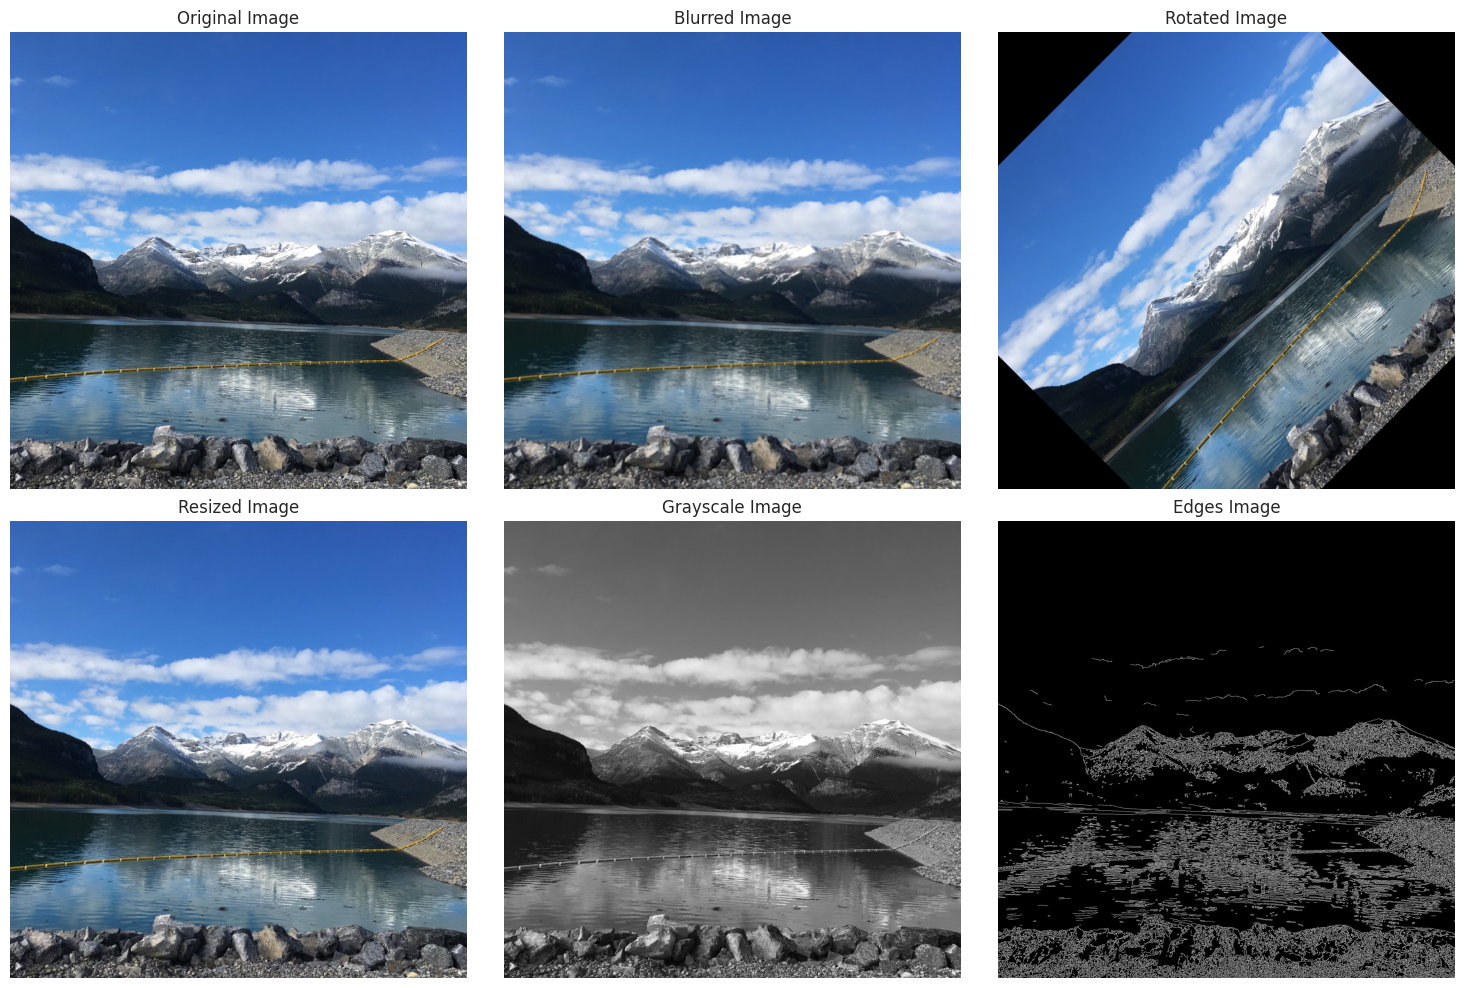

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the original and transformed images
original_image = cv2.imread('/content/Kananaskis.jpg')
blurred_image = cv2.imread('blurred_image.jpg')
rotated_image = cv2.imread('rotated_image.jpg')
resized_image = cv2.imread('resized_image.jpg')
grayscale_image = cv2.imread('grayscale_image.jpg')
edges_image = cv2.imread('edges_image.jpg')
binary_threshold_image = cv2.imread('binary_threshold.jpg')

# Convert BGR images to RGB for displaying with Matplotlib
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
blurred_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)
rotated_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
# Note: The grayscale, edges, and binary threshold images are single-channel, so they don't need conversion

# Create a 2x3 grid for displaying the images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Display each image in its respective subplot
ax[0, 0].imshow(original_image)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(blurred_image)
ax[0, 1].set_title('Blurred Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(rotated_image)
ax[0, 2].set_title('Rotated Image')
ax[0, 2].axis('off')

ax[1, 0].imshow(resized_image)
ax[1, 0].set_title('Resized Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(grayscale_image, cmap='gray')
ax[1, 1].set_title('Grayscale Image')
ax[1, 1].axis('off')

ax[1, 2].imshow(edges_image, cmap='gray')
ax[1, 2].set_title('Edges Image')
ax[1, 2].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# The end